In [4700]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4701]:
plt.rcParams['figure.dpi'] = 90

def ws(img_src: np.ndarray, cleaned_img: np.ndarray, dt_coef: float, dilate_iterations=4):
    # sure background area
    kernel = np.ones((3,3),np.uint8)
    sure_bg = cv2.dilate(cleaned_img, kernel, iterations=dilate_iterations)
    # k3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    #sure_bg = cv2.dilate(cleaned_img, k3, iterations=4)

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(sure_bg, cmap='gray')
    ax.set_title('sure_bg')
    
    # Finding sure foreground area
    dist_transform: np.ndarray = cv2.distanceTransform(cleaned_img, cv2.DIST_L2, 5)
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(dist_transform, cmap='gray')
    ax.set_title('dist_transform')
    
    _, sure_fg = cv2.threshold(dist_transform, dt_coef * dist_transform.max(), 255, 0) ## dt coeff
    sure_fg = sure_fg.astype(np.uint8)

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(sure_fg, cmap='gray')
    ax.set_title('sure_fg')
    
    # Finding unknown region
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(unknown, cmap='gray')
    ax.set_title('unknown region')
    
     # Marker labeling
    _, markers = cv2.connectedComponents(sure_fg)
    
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1

    # Now, mark the region of unknown with zero
    markers[unknown == 255] = 0
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(markers, cmap='jet')
    ax.set_title('markers')
    
    # watershed
    water_markers = cv2.watershed(img_src, markers)
    labels = np.unique(water_markers)
    borders = []
    for label in labels[2:]:
        target = np.where(markers == label, 255, 0).astype(np.uint8)
        contours, _ = cv2.findContours(target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        borders.append(contours[0])
    fig, ax = plt.subplots(1, 1)
    contours = cv2.drawContours(img_src.copy(), borders, -1, color=(0, 255, 0), thickness=2)
    ax.imshow(cv2.cvtColor(contours, cv2.COLOR_BGR2RGB))
    ax.set_title('result')

k14 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (14, 14))
k5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

Text(0.5, 1.0, 'grayscale')

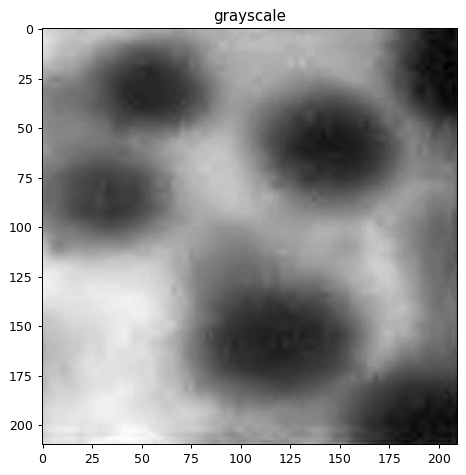

In [4702]:
first_path = './app-data/inputs/cells-01.png'
img_src = cv2.imread(first_path)
gs = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(gs, cmap='gray')
ax.set_title('grayscale')

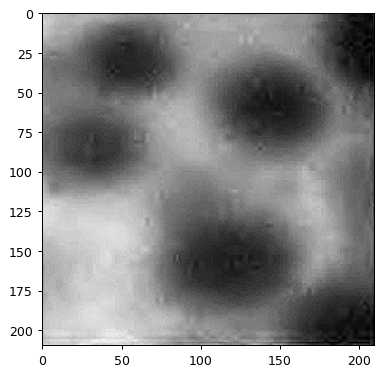

In [4703]:
# whatever
k9 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
cleaned_img = gs.copy()
t = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
grad = cv2.filter2D(src=gs, ddepth=-1, kernel=t)
plt.imshow(grad, cmap="gray")
# 
# cleaned_img = cv2.morphologyEx(gs, cv2.MORPH_GRADIENT, kernel=k9)
# plt.imshow(cleaned_img, cmap='gray')

Text(0.5, 1.0, 'threshold')

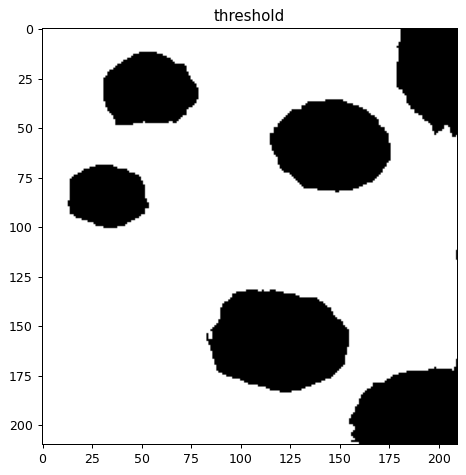

In [4704]:
ret, thresh = cv2.threshold(cleaned_img, 50, 255, type=cv2.THRESH_BINARY)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(thresh, cmap='gray')
ax.set_title('threshold')

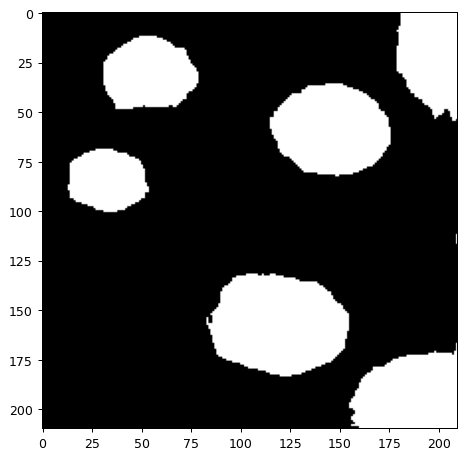

In [4705]:
# # eliminate noise
cleaned_img = thresh.copy()
cv2.bitwise_not(cleaned_img, cleaned_img)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(cleaned_img, cmap='gray')

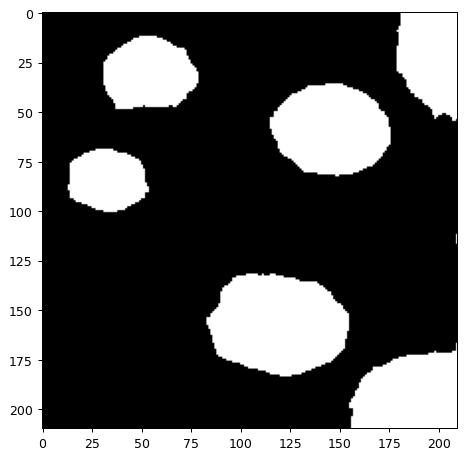

In [4706]:
k3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
cleaned_img = cv2.morphologyEx(cleaned_img,cv2.MORPH_CLOSE,k5)   
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(cleaned_img, cmap='gray')

# Test image

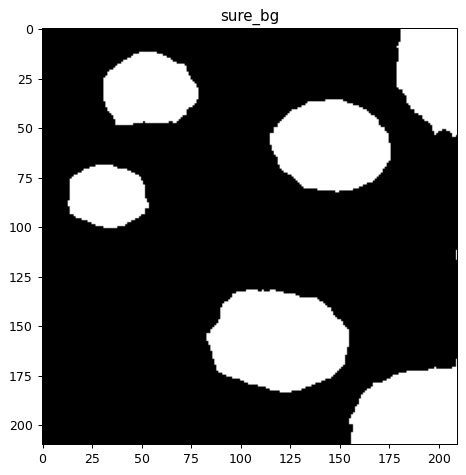

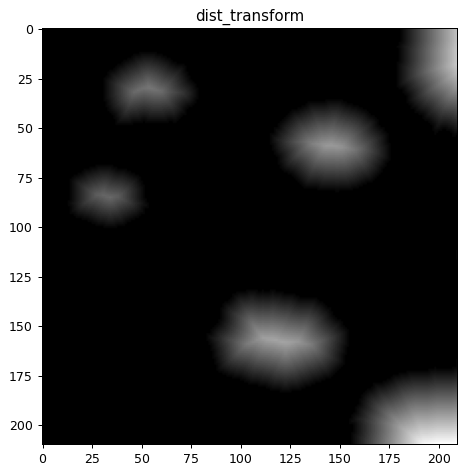

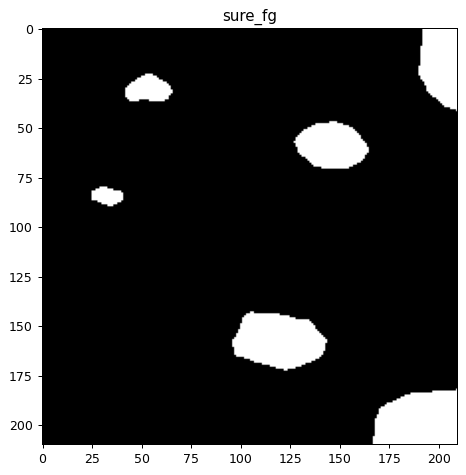

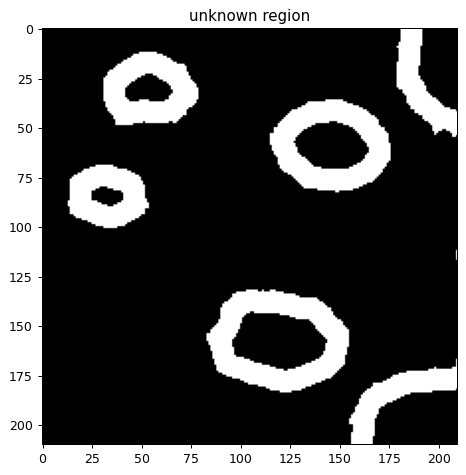

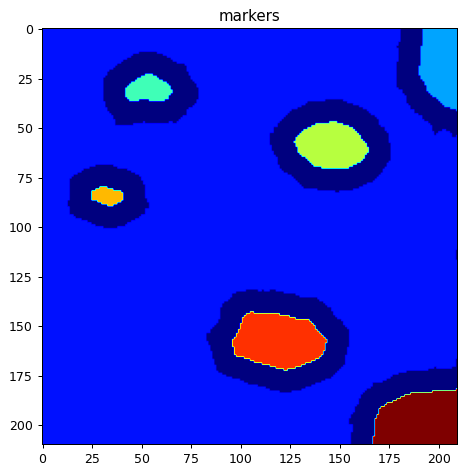

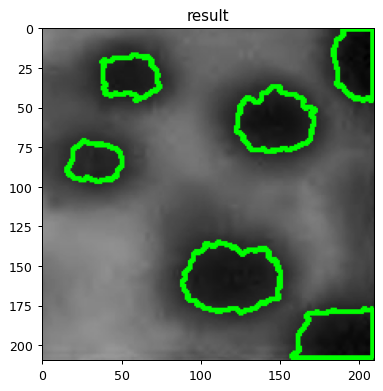

In [4707]:
ws(img_src, cleaned_img, 0.3, 0)

# Image 02

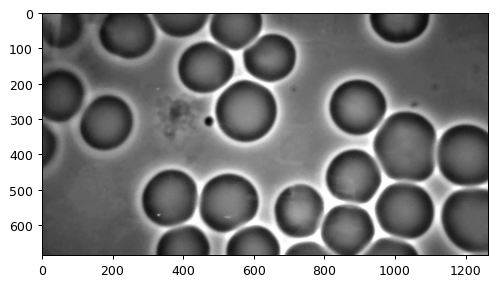

In [4708]:
second_path = './app-data/inputs/ws-02.jpg'
img_src = cv2.imread(second_path)
gs = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
plt.imshow(gs, cmap='gray')

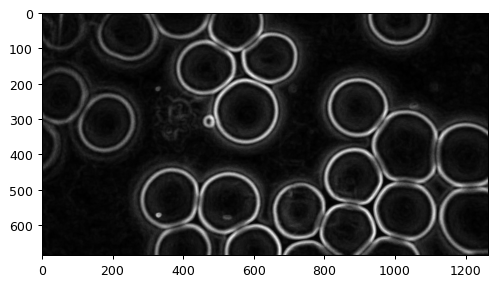

In [4709]:
k9 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
cleaned_img = cv2.morphologyEx(gs, cv2.MORPH_GRADIENT, kernel=k9)
plt.imshow(cleaned_img, cmap='gray')

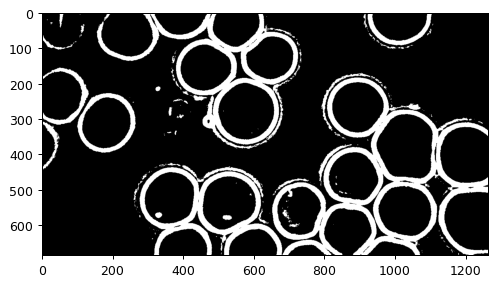

In [4710]:
ret, tres = cv2.threshold(cleaned_img, 30, 255, type=cv2.THRESH_BINARY)
plt.imshow(tres, cmap='gray')

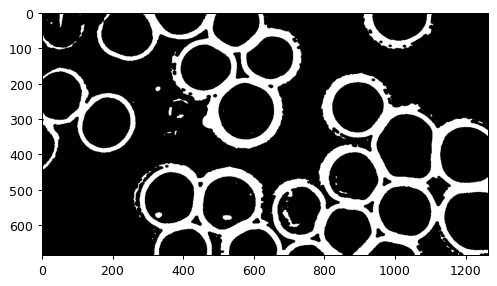

In [4711]:
cleaned_img = tres.copy()
cleaned_img = cv2.morphologyEx(tres,cv2.MORPH_CLOSE, k5, iterations=2)
plt.imshow(cleaned_img, cmap='gray')

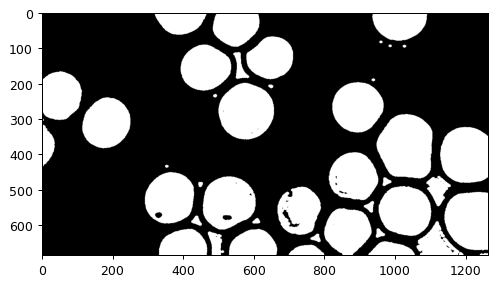

In [4712]:
cv2.floodFill(cleaned_img, None, (150, 150), 255)
cv2.bitwise_not(cleaned_img, cleaned_img)
plt.imshow(cleaned_img, cmap='gray')

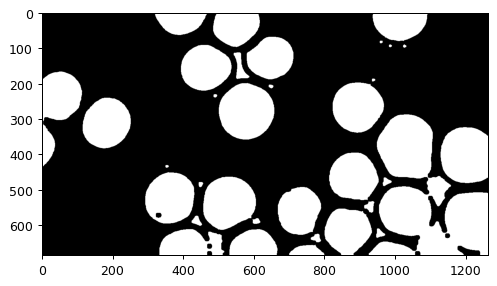

In [4713]:
cleaned_img = cv2.morphologyEx(cleaned_img,cv2.MORPH_CLOSE, k14, iterations=1)
plt.imshow(cleaned_img, cmap='gray')

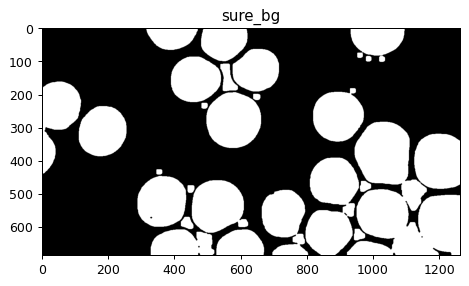

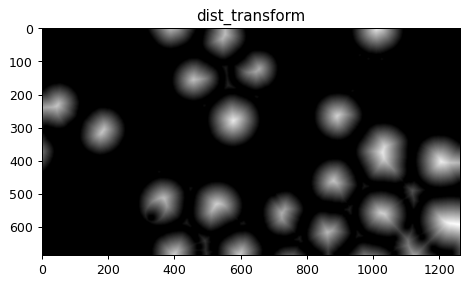

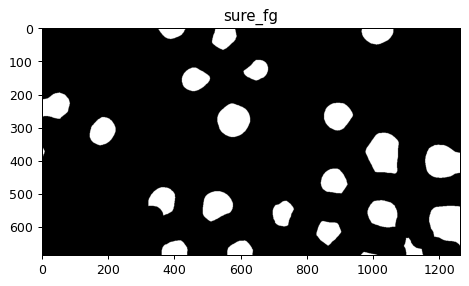

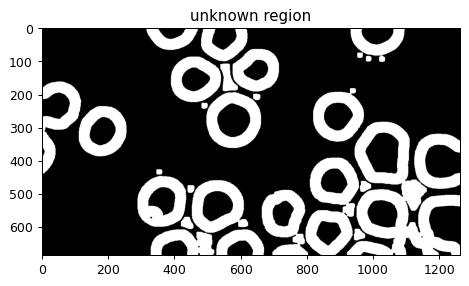

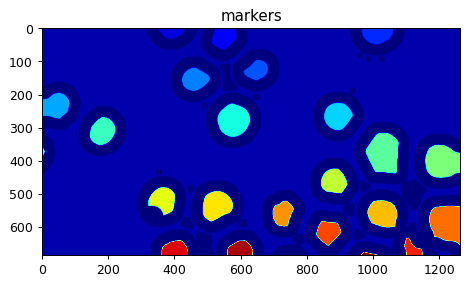

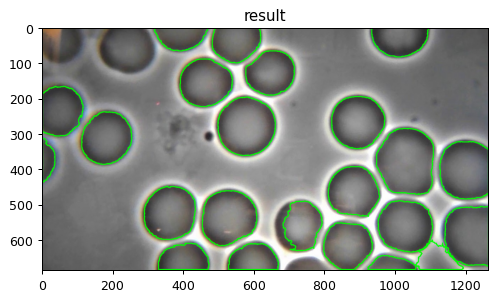

In [4714]:
ws(img_src, cleaned_img, 0.35)

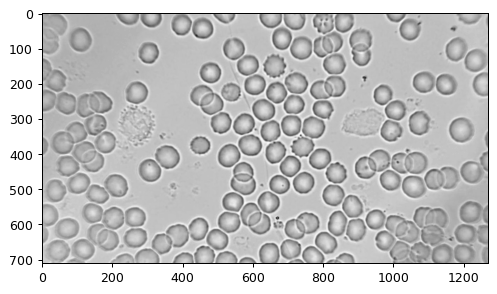

In [4715]:
plt.rcParams['figure.dpi'] = 90
third_path = './app-data/inputs/ws-03.jpg'
img_src = cv2.imread(third_path)
gs = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
plt.imshow(gs, cmap='gray')

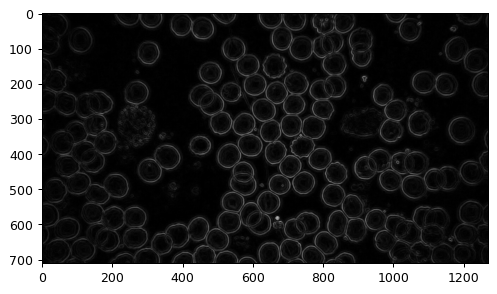

In [4716]:
k3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
k5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
k7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
k8 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8,8))
k9 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))

cleaned_img = cv2.morphologyEx(gs, cv2.MORPH_GRADIENT, kernel=k3)
plt.imshow(cleaned_img, cmap='gray')

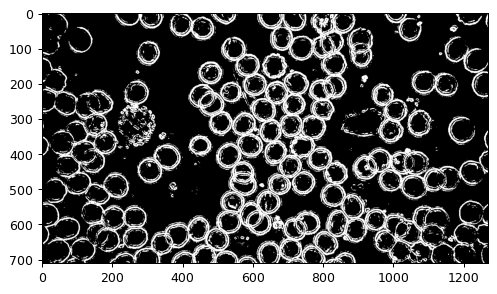

In [4717]:
ret, tres = cv2.threshold(cleaned_img, 14, 255, type=cv2.THRESH_BINARY)
plt.imshow(tres, cmap='gray')

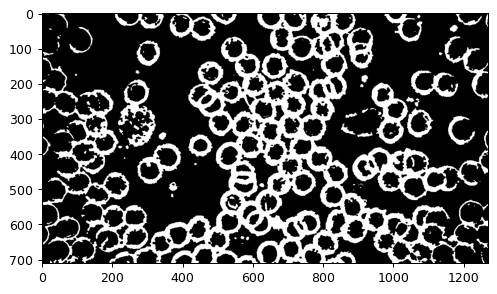

In [4718]:
cleaned_img = tres.copy()

cleaned_img = cv2.morphologyEx(cleaned_img, cv2.MORPH_CLOSE, k5, iterations=1)
plt.imshow(cleaned_img, cmap='gray')

cleaned_img = cv2.morphologyEx(cleaned_img, cv2.MORPH_OPEN, k3)
plt.imshow(cleaned_img, cmap='gray')

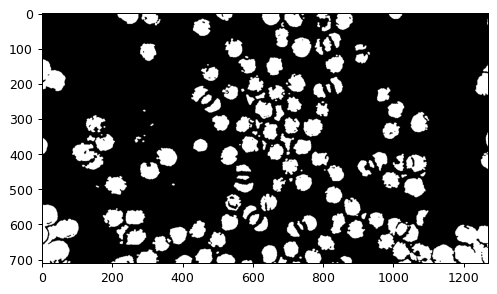

In [4719]:
cv2.floodFill(cleaned_img, None, (200, 100), 255)
cv2.floodFill(cleaned_img, None, (1000, 100), 255)
cv2.floodFill(cleaned_img, None, (750, 150), 255)

cv2.floodFill(cleaned_img, None, (900, 680), 255)
cv2.floodFill(cleaned_img, None, (780, 550), 255)

cv2.floodFill(cleaned_img, None, (600, 650), 255)
cv2.floodFill(cleaned_img, None, (100, 550), 255)
cv2.floodFill(cleaned_img, None, (620, 450), 255)
cv2.floodFill(cleaned_img, None, (180, 690), 255)
cv2.floodFill(cleaned_img, None, (20, 450), 255)
cv2.floodFill(cleaned_img, None, (350, 690), 255)
cv2.floodFill(cleaned_img, None, (550, 260), 255)
cv2.floodFill(cleaned_img, None, (780, 50), 255)

cv2.floodFill(cleaned_img, None, (750, 50), 255)
cv2.floodFill(cleaned_img, None, (750, 250), 255)

cv2.bitwise_not(cleaned_img, cleaned_img)
plt.imshow(cleaned_img, cmap='gray')

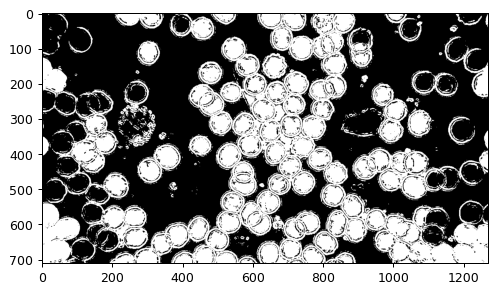

In [4720]:
cv2.add(tres, cleaned_img, cleaned_img)
plt.imshow(cleaned_img, cmap='gray')

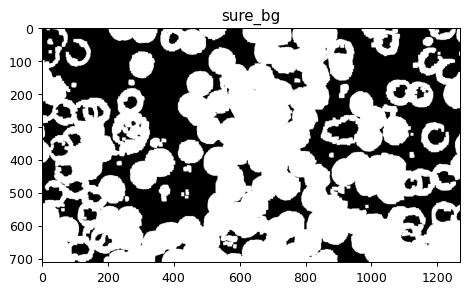

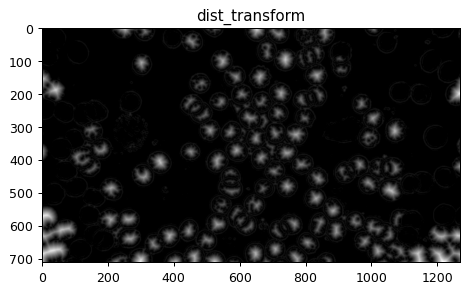

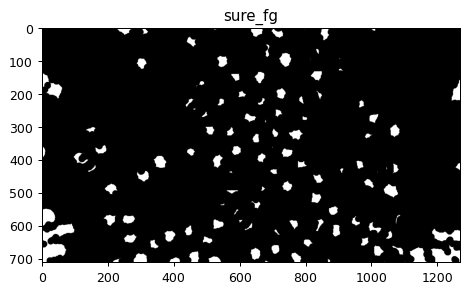

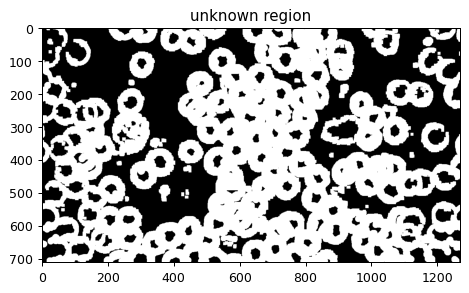

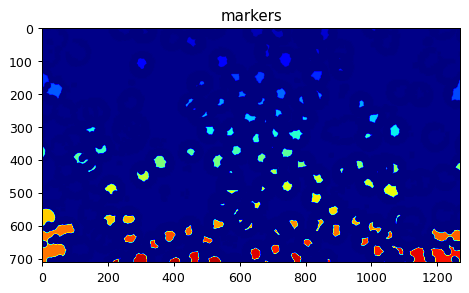

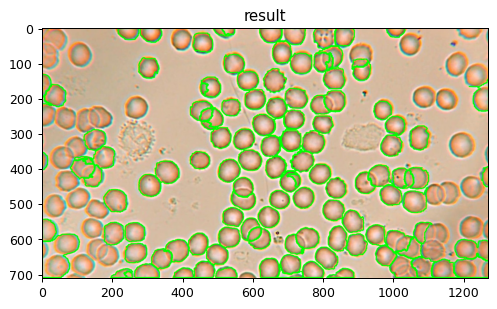

In [4721]:
ws(img_src, cleaned_img, 0.3)